In [ ]:
import pandas as pd

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

dat = campaign.query('pdays < 999')

pdays_mean = dat.pdays.mean()

new_data = campaign

new_data['pdays'] = new_data.pdays.replace(to_replace=[999], value=[pdays_mean])

new_data.pdays.value_counts()


6.014521     39673
3.000000       439
6.000000       412
4.000000       118
9.000000        64
2.000000        61
7.000000        60
12.000000       58
10.000000       52
5.000000        46
13.000000       36
11.000000       28
1.000000        26
15.000000       24
14.000000       20
8.000000        18
0.000000        15
16.000000       11
17.000000        8
18.000000        7
22.000000        3
19.000000        3
21.000000        2
25.000000        1
27.000000        1
20.000000        1
26.000000        1
Name: pdays, dtype: int64

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
# https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html


# Let's over sample the minority class, which samples with replacement until the
# majority (died) and the minority (survived) are equal
# To replace the smaller part od the dataset
ro = RandomOverSampler()

new_data['education']=campaign['education'].map({
    'illiterate': 'low',
    'basic.4y': 'low',
    'basic.6y':'low',
    'basic.9y':'low',
    'high.school': 'low',
    'professional.course':'high',
    'university.degree':'high',
    'unknown':'unknown'
    })

# Decide which features to use
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'euribor3m', 'nr.employed']
X = pd.get_dummies(new_data[features], drop_first=True)
y = new_data['y']

# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

X_new_train, y_new_train = ro.fit_resample(X_train, y_train)

# Build the decision tree

clf = DecisionTreeClassifier(max_leaf_nodes=25)

# Train it
clf.fit(X_new_train, y_new_train)

# Test it 
clf.score(X_test, y_test)

0.8271425103180383

In [ ]:
new_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,low,no,no,no,telephone,may,mon,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,low,unknown,no,no,telephone,may,mon,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,low,no,yes,no,telephone,may,mon,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,low,no,no,no,telephone,may,mon,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,low,no,no,yes,telephone,may,mon,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,high,no,yes,no,cellular,nov,fri,1,6.014521,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,high,no,no,no,cellular,nov,fri,1,6.014521,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,high,no,yes,no,cellular,nov,fri,2,6.014521,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,high,no,no,no,cellular,nov,fri,1,6.014521,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
X_test

,age,campaign,pdays,previous,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
9511,52,1,6.014521,0,1.4,-41.8,4.961,5228.1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0
4482,45,2,6.014521,0,1.1,-36.4,4.856,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0
718,46,3,6.014521,0,1.1,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
5757,29,2,6.014521,0,1.1,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0
6293,60,5,6.014521,0,1.1,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20304,30,9,6.014521,0,1.4,-36.1,4.965,5228.1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
25384,58,1,6.014521,0,-0.1,-42.0,4.153,5195.8,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
32957,29,1,6.014521,0,-1.8,-46.2,1.299,5099.1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
15767,39,4,6.014521,0,1.4,-42.7,4.960,5228.1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [ ]:
# YOU FORGOT THE PICKLESSS!!!!!
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)

In [ ]:
# Saving the model as a file
from joblib import dump, load
dump(clf2, 'main_tree_model.joblib')
clf_dump_load = load('main_tree_model.joblib') 
from google.colab import files
files.download("main_tree_model.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
holdout = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv")
# transforming the holdout data

new_holdout = holdout

new_holdout['pdays'] = new_holdout.pdays.replace(to_replace=[999], value=[6.014521])

new_holdout['education']=new_holdout['education'].map({
    'illiterate': 'low',
    'basic.4y': 'low',
    'basic.6y':'low',
    'basic.9y':'low',
    'high.school': 'low',
    'professional.course':'high',
    'university.degree':'high',
    'unknown':'unknown'
    })

features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'euribor3m', 'nr.employed']
X_holdout = pd.get_dummies(new_holdout[features], drop_first=True)



In [ ]:
X_holdout

,age,campaign,pdays,previous,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_low,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,30,2,6.014521,0,-1.8,-46.2,1.313,5099.1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,39,4,6.014521,0,1.1,-36.4,4.855,5191.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,25,1,6.014521,0,1.4,-41.8,4.962,5228.1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0
3,38,3,6.014521,0,1.4,-41.8,4.959,5228.1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0
4,47,1,6.014521,0,-0.1,-42.0,4.191,5195.8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,1,6.014521,0,1.4,-42.7,4.958,5228.1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0
4115,39,1,6.014521,0,1.4,-42.7,4.959,5228.1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
4116,27,2,6.014521,1,-1.8,-46.2,1.354,5099.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4117,58,1,6.014521,0,1.4,-36.1,4.966,5228.1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
predictions = clf2.predict(X_holdout)
predictions_df = pd.DataFrame(predictions)
predictions_df.rename( columns={0:'predictions'}, inplace=True )
predictions_df['predictions'] = predictions_df['predictions'].map({
    'yes': 1,
    'no': 0
    })
predictions_df.to_csv("predictions.csv")
from google.colab import files
files.download("predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


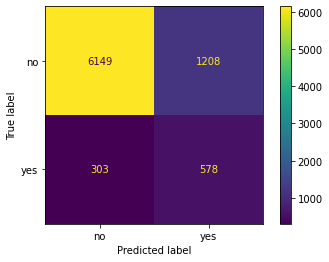

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import recall_score
y_predrf = clf.predict(X_test)
print("Recall:", recall_score(y_test, y_predrf, pos_label='yes'))

Recall: 0.656072644721907


In [ ]:
from sklearn.metrics import classification_report
y_predrf = clf.predict(X_test)

print(classification_report(y_test, y_predrf))

feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp


              precision    recall  f1-score   support

          no       0.95      0.84      0.89      7357
         yes       0.32      0.66      0.43       881

    accuracy                           0.82      8238
   macro avg       0.64      0.75      0.66      8238
weighted avg       0.89      0.82      0.84      8238



nr.employed             0.699882
cons.conf.idx           0.139094
euribor3m               0.070254
age                     0.028512
poutcome_success        0.027963
campaign                0.015550
default_unknown         0.012559
contact_telephone       0.003646
previous                0.002541
day_of_week_mon         0.000000
job_self-employed       0.000000
pdays                   0.000000
emp.var.rate            0.000000
day_of_week_wed         0.000000
day_of_week_tue         0.000000
day_of_week_thu         0.000000
job_blue-collar         0.000000
job_entrepreneur        0.000000
job_housemaid           0.000000
job_management          0.000000
job_retired             0.000000
job_services            0.000000
job_student             0.000000
job_technician          0.000000
poutcome_nonexistent    0.000000
job_unknown             0.000000
marital_married         0.000000
marital_single          0.000000
marital_unknown         0.000000
default_yes             0.000000
housing_un

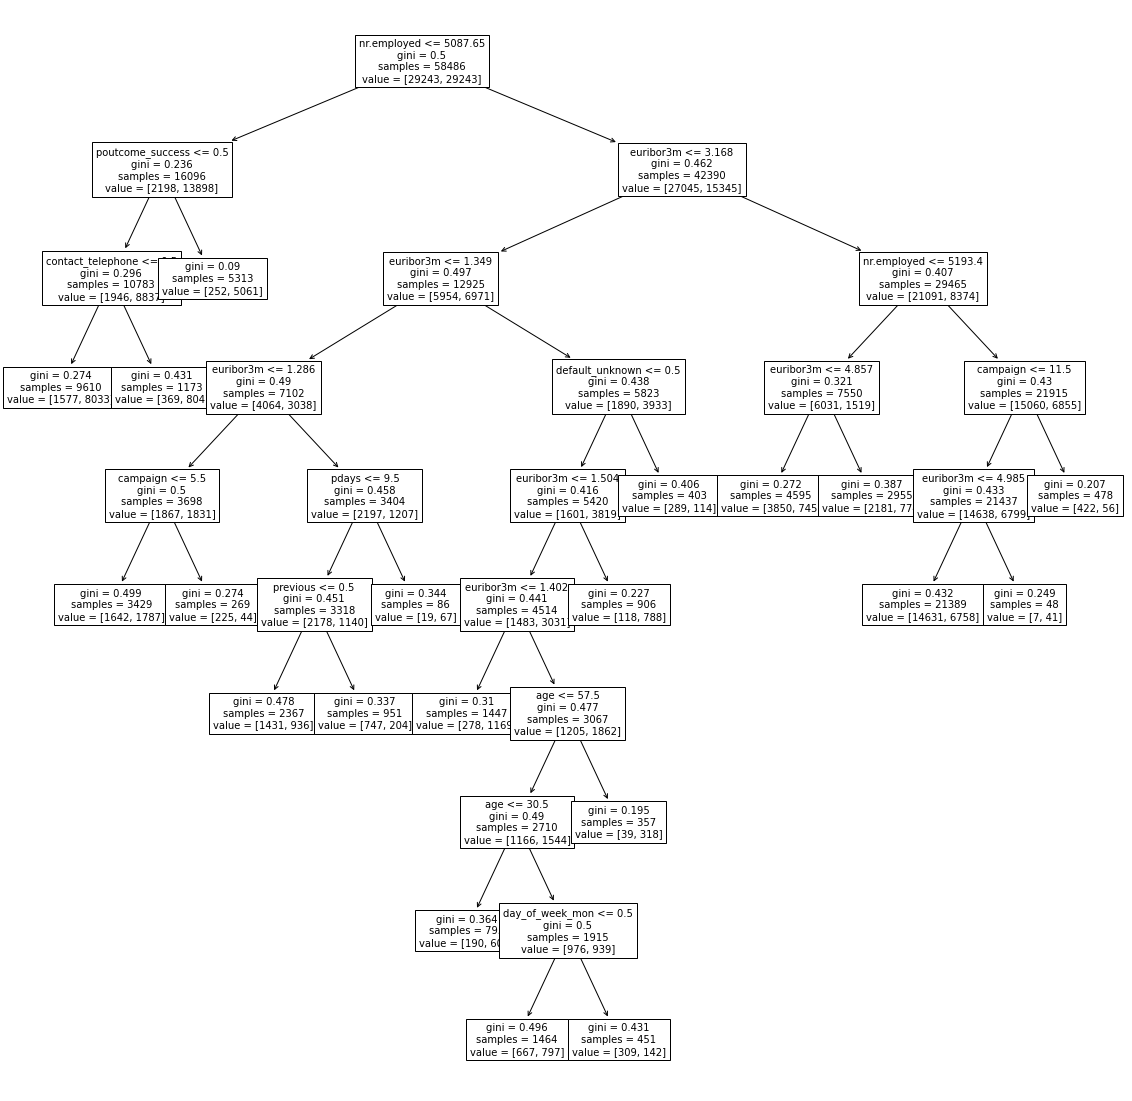

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, fontsize=10, feature_names=X.columns)
plt.show()

In [ ]:
cons_price_high = new_data[new_data['cons.price.idx'] > 93.749]
cons_price_high

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,6.014521,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,6.014521,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,6.014521,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,6.014521,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
cons_price_low = new_data[new_data['cons.price.idx'] <= 93.749]
cons_price_low

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
18822,48,housemaid,married,basic.4y,unknown,no,yes,cellular,aug,mon,1,6.014521,0,nonexistent,1.4,93.444,-36.1,4.970,5228.1,no
18823,45,management,divorced,high.school,no,no,yes,cellular,aug,mon,1,6.014521,0,nonexistent,1.4,93.444,-36.1,4.970,5228.1,no
18824,34,technician,single,university.degree,no,yes,no,cellular,aug,mon,1,6.014521,0,nonexistent,1.4,93.444,-36.1,4.970,5228.1,no
18825,34,technician,single,university.degree,no,no,no,cellular,aug,mon,1,6.014521,0,nonexistent,1.4,93.444,-36.1,4.970,5228.1,no
18826,41,technician,married,university.degree,no,unknown,unknown,cellular,aug,mon,1,6.014521,0,nonexistent,1.4,93.444,-36.1,4.970,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39563,28,technician,single,university.degree,no,no,yes,cellular,apr,fri,1,6.014521,1,failure,-1.8,93.749,-34.6,0.663,5008.7,no
39564,28,technician,single,university.degree,no,yes,no,cellular,apr,fri,1,6.014521,0,nonexistent,-1.8,93.749,-34.6,0.663,5008.7,no
39565,31,student,single,university.degree,no,yes,yes,cellular,apr,fri,1,6.000000,2,success,-1.8,93.749,-34.6,0.663,5008.7,yes
39566,21,student,single,high.school,no,yes,no,cellular,apr,fri,1,6.014521,0,nonexistent,-1.8,93.749,-34.6,0.663,5008.7,yes


In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
# https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html


# Let's over sample the minority class, which samples with replacement until the
# majority (died) and the minority (survived) are equal
ro = RandomOverSampler()

# Decide which features to use
X = pd.get_dummies(cons_price_high[features], drop_first=True)
y = cons_price_high['y']

# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

X_new_train, y_new_train = ro.fit_resample(X_train, y_train)

# Build the decision tree

clf_2 = DecisionTreeClassifier(max_leaf_nodes=25)

# Train it
clf_2.fit(X_new_train, y_new_train)

# Test it 
clf_2.score(X_test, y_test)

0.8632374451487079

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


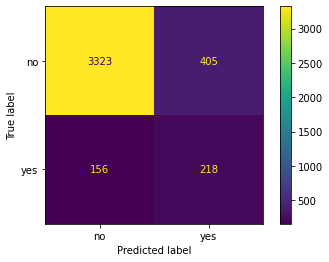

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_2, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_predrf = clf_2.predict(X_test)

print(classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

          no       0.96      0.89      0.92      3728
         yes       0.35      0.58      0.44       374

    accuracy                           0.86      4102
   macro avg       0.65      0.74      0.68      4102
weighted avg       0.90      0.86      0.88      4102



In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
# https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html


# Let's over sample the minority class, which samples with replacement until the
# majority (died) and the minority (survived) are equal
ro = RandomOverSampler()

# Decide which features to use
X = pd.get_dummies(cons_price_low[features], drop_first=True)
y = cons_price_low['y']

# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

X_new_train, y_new_train = ro.fit_resample(X_train, y_train)

# Build the decision tree

clf_3 = DecisionTreeClassifier(max_leaf_nodes=25)

# Train it
clf_3.fit(X_new_train, y_new_train)

# Test it 
clf_3.score(X_test, y_test)

0.7666827852998066

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


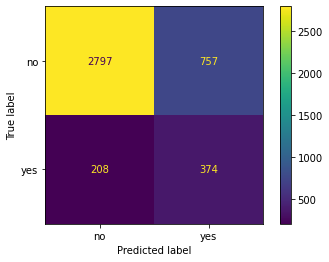

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_3, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_predrf = clf_3.predict(X_test)

print(classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

          no       0.93      0.79      0.85      3554
         yes       0.33      0.64      0.44       582

    accuracy                           0.77      4136
   macro avg       0.63      0.71      0.64      4136
weighted avg       0.85      0.77      0.79      4136



In [ ]:
campaign['nr.employed'].describe()

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

In [ ]:
employed_high = new_data[new_data['nr.employed'] > 5191]
employed_high

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7763,26,management,single,university.degree,no,no,no,telephone,jun,mon,3,6.014521,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
7764,42,technician,married,professional.course,unknown,no,no,telephone,jun,mon,9,6.014521,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
7765,30,admin.,married,university.degree,no,no,no,telephone,jun,mon,2,6.014521,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
7766,55,technician,married,basic.9y,no,no,no,telephone,jun,mon,3,6.014521,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
7767,41,blue-collar,married,basic.4y,no,yes,no,telephone,jun,mon,2,6.014521,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27675,41,blue-collar,single,basic.9y,unknown,no,no,cellular,nov,fri,3,6.014521,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
27676,38,technician,married,professional.course,no,yes,yes,telephone,nov,wed,1,6.014521,0,nonexistent,-0.1,93.200,-42.0,3.901,5195.8,no
27677,32,unemployed,single,high.school,no,no,yes,telephone,nov,thu,1,6.014521,0,nonexistent,-0.1,93.200,-42.0,3.879,5195.8,no
27678,46,entrepreneur,single,professional.course,no,yes,no,telephone,nov,thu,1,6.014521,0,nonexistent,-0.1,93.200,-42.0,3.879,5195.8,no


In [ ]:
employed_low = new_data[new_data['nr.employed'] <= 5191]
employed_low

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,6.014521,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,6.014521,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,6.014521,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,6.014521,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
# https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html


# Let's over sample the minority class, which samples with replacement until the
# majority (died) and the minority (survived) are equal
ro = RandomOverSampler()

# Decide which features to use
X = pd.get_dummies(employed_high[features], drop_first=True)
y = employed_high['y']

# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

X_new_train, y_new_train = ro.fit_resample(X_train, y_train)

# Build the decision tree

clf_4 = DecisionTreeClassifier(max_leaf_nodes=25)

# Train it
clf_4.fit(X_new_train, y_new_train)

# Test it 
clf_4.score(X_test, y_test)

0.5436746987951807

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


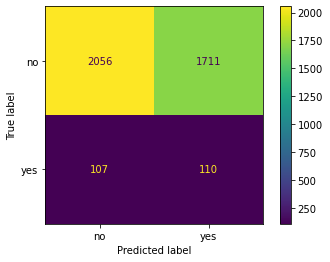

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_4, X_test, y_test)
plt.show()

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
# https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html


# Let's over sample the minority class, which samples with replacement until the
# majority (died) and the minority (survived) are equal
ro = RandomOverSampler()

# Decide which features to use
X = pd.get_dummies(employed_low[features], drop_first=True)
y = employed_low['y']

# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

X_new_train, y_new_train = ro.fit_resample(X_train, y_train)

# Build the decision tree

clf_5 = DecisionTreeClassifier(max_leaf_nodes=25)

# Train it
clf_5.fit(X_new_train, y_new_train)

# Test it 
clf_5.score(X_test, y_test)

0.7896592244418331

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


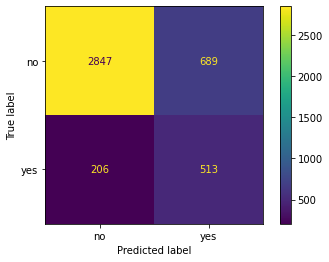

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_5, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_predrf = clf_5.predict(X_test)

print(classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

          no       0.93      0.81      0.86      3536
         yes       0.43      0.71      0.53       719

    accuracy                           0.79      4255
   macro avg       0.68      0.76      0.70      4255
weighted avg       0.85      0.79      0.81      4255



In [ ]:
import pickle
s5 = pickle.dumps(clf_5)
clf5 = pickle.loads(s5)

In [ ]:
# Saving the model as a file
from joblib import dump, load
dump(clf5, 'lowemp_tree_model.joblib')
clf5_dump_load = load('lowemp_tree_model.joblib') 
from google.colab import files
files.download("lowemp_tree_model.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>